## Лабораторная работа №1
### Создание "истории о данных" (Data Storytelling)
Коценко А.А. ИУ5-22М

#### Цель лабораторной работы
Изучение различных методов визуализация данных и создание истории на основе данных.

#### Задание
- Выбрать набор данных (датасет).
- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований.
  1. История должна содержать 5 шагов. Каждый шаг содержит график и его текстовую интерпретацию.
  2. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
  3. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
  4. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
  5. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.

### Выбор датасета
#### Описание атрибутов
- MedInc — Средний доход для домохозяйств в пределах квартала домов
- HouseAge — Возраст домов в пределах квартала (меньшее число означает более новое здание)
- AveRooms — Среднее количество комнат в пределах квартала.
- AveBedrms — Среднее количество спален в пределах квартала.
- Population — Общее количество людей, проживающих в пределах квартала.
- AveOccup — Среднее количество участников домохозяйства.
- Latitude — Показатель того, насколько далеко к северу находится дом (чем выше значение, тем дальше к северу).
- Longitude — Показатель того, насколько далеко на запад находится дом (чем более отрицательное значение, тем дальше на запад).
- MedHouseValue —Средняя стоимость жилья для домохозяйств в пределах квартала.

In [1]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True).frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
df.info() # Prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### История о данных

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point
%matplotlib inline

### Первый шаг — Violin plot

<AxesSubplot:xlabel='MedHouseVal'>

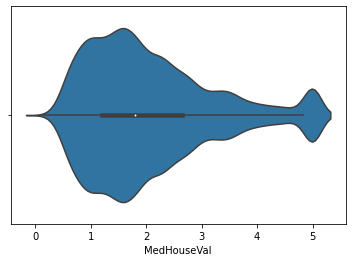

In [4]:
sns.violinplot(x=df['MedHouseVal'])

### Второй шаг — Boxplot

<AxesSubplot:xlabel='MedHouseVal'>

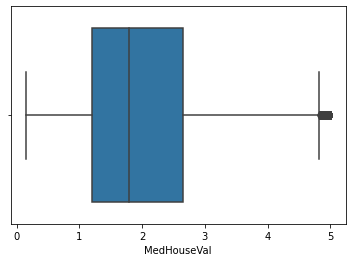

In [5]:
sns.boxplot(x=df['MedHouseVal'])

### Третий шаг — Heatmap
- MedInc — Средний доход для домохозяйств в пределах квартала домов
- HouseAge — Возраст домов в пределах квартала (меньшее число означает более новое здание)
- AveRooms — Среднее количество комнат в пределах квартала.
- AveBedrms — Среднее количество спален в пределах квартала.
- Population — Общее количество людей, проживающих в пределах квартала.
- AveOccup — Среднее количество участников домохозяйства.
- Latitude — Показатель того, насколько далеко к северу находится дом (чем выше значение, тем дальше к северу).
- Longitude — Показатель того, насколько далеко на запад находится дом (чем более отрицательное значение, тем дальше на запад).
- MedHouseValue —Средняя стоимость жилья для домохозяйств в пределах квартала.

<AxesSubplot:>

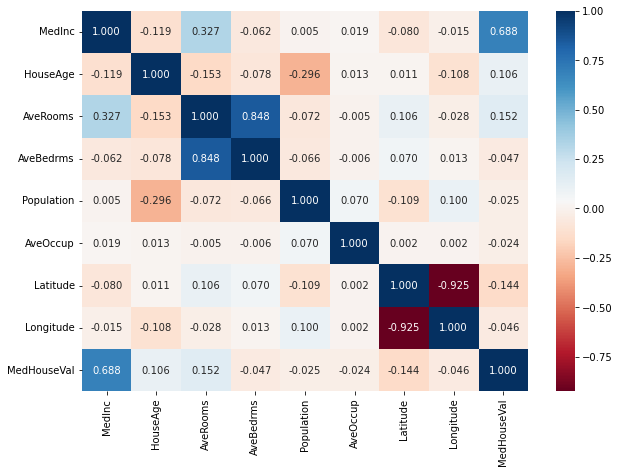

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='RdBu',annot=True,fmt='.3f')

### Четвертый шаг — Correlogram

<Figure size 864x864 with 0 Axes>

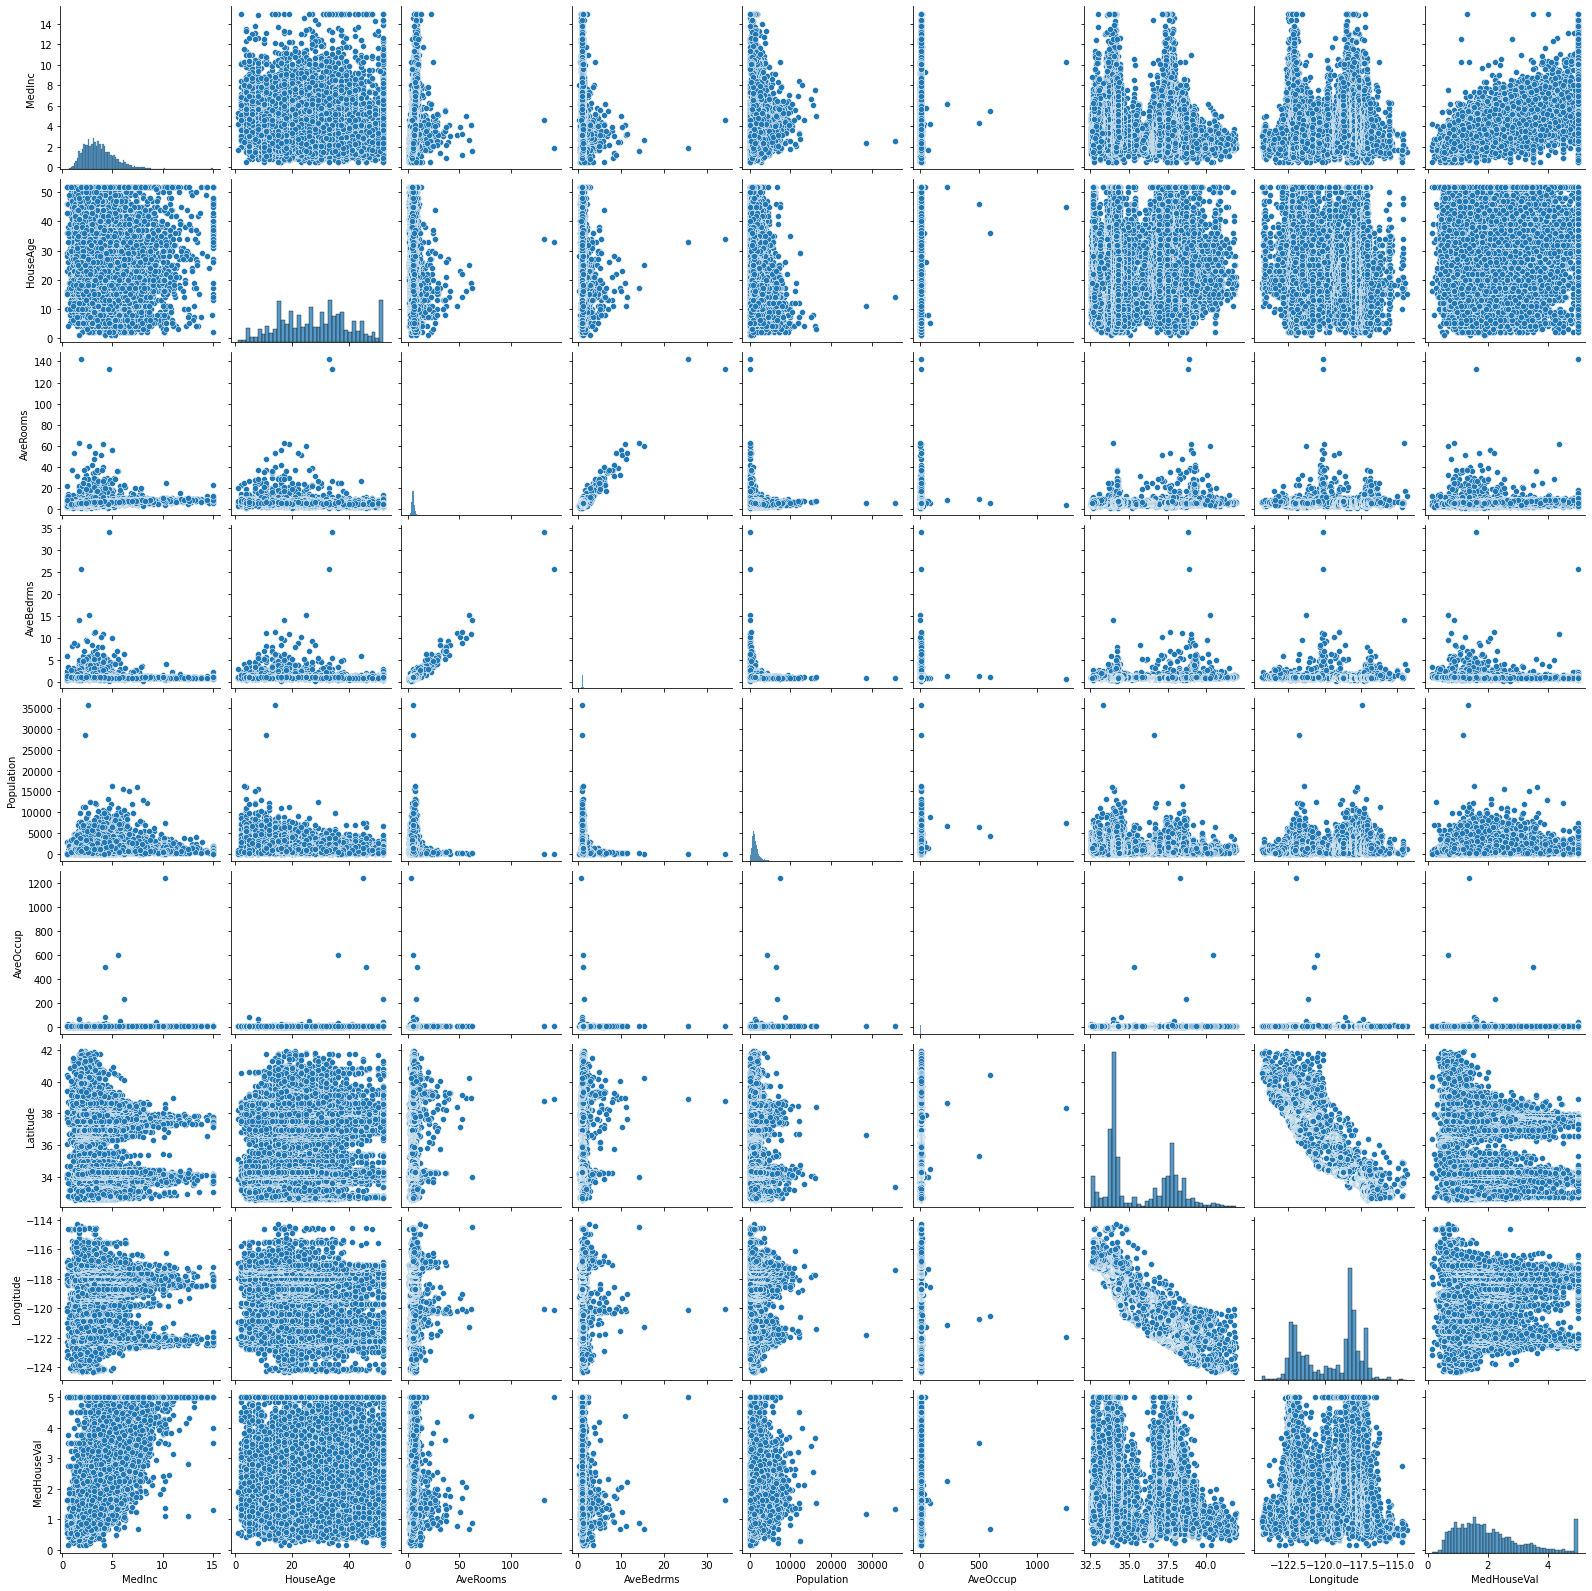

In [7]:
plt.figure(figsize=(12,12))
sns.pairplot(df)

### Пятый — Map

<AxesSubplot:>

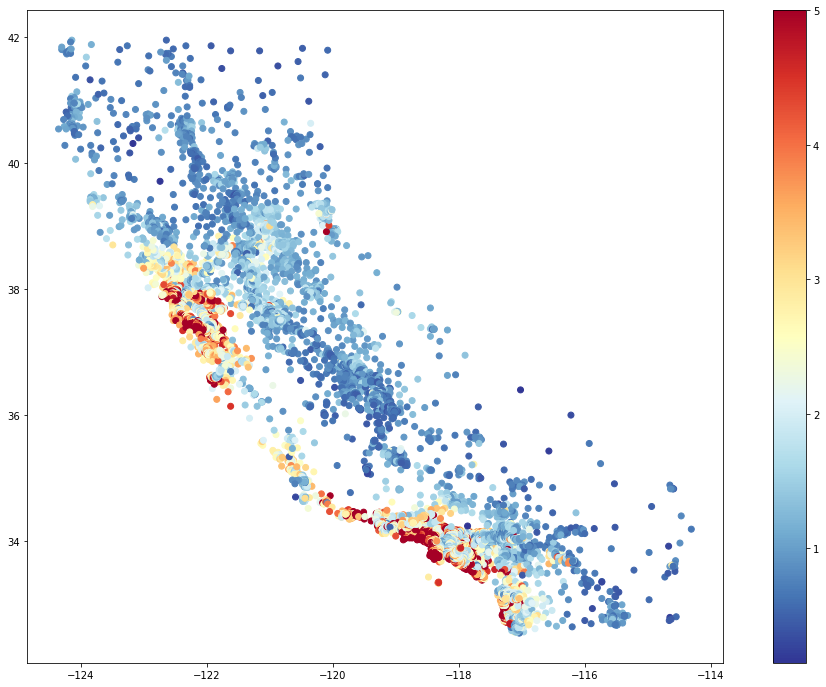

In [8]:
# Средняя стоимость жилья для домохозяйств в пределах квартала.
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geo_df = gpd.GeoDataFrame(df,geometry = geometry) #california_housing
geo_df.plot(column='MedHouseVal',legend=True, figsize=(18, 12),cmap='RdYlBu_r')

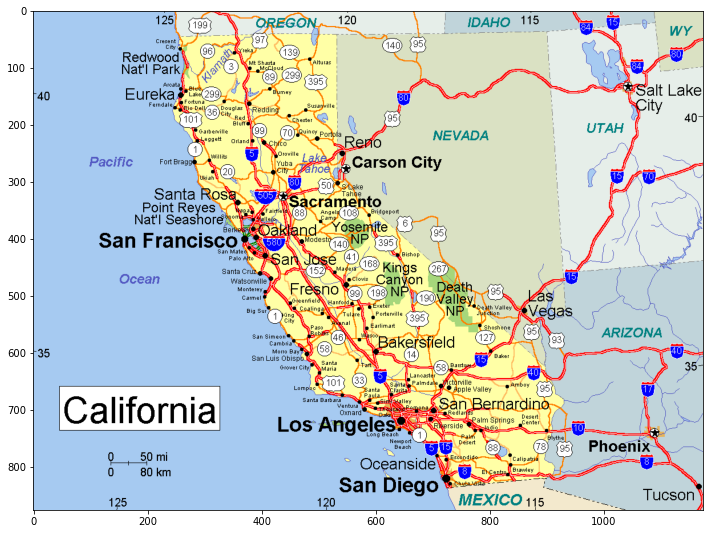

In [9]:
plt.figure(figsize=(12,15))
img = mpimg.imread('california.png')
imgplot = plt.imshow(img)

### Вывод к истории о данных
По Violin plot видно, что основная доля домов находится по стоимости от 0,5 до 2,5. По диаграммам Violin plot и Boxplot заметен выброс в районе 5. Наиболее вероятно примерно столько стоит элитная недвижимость. По тепловой карте понятно, что в основном между параметрами зависимость довольно низкая. Средняя зависимость между MedHouseVal и Medinc, высокая положительная зависимость между AveRooms и AveBedrms, а высокая отрицательная между Longitude и Latitude. В конце была построена карта, на которой видно, что на побережье Калифорнии недвижимость стоит существенно выше, чем в глубине штата.

### Дополнительные карты

<AxesSubplot:>

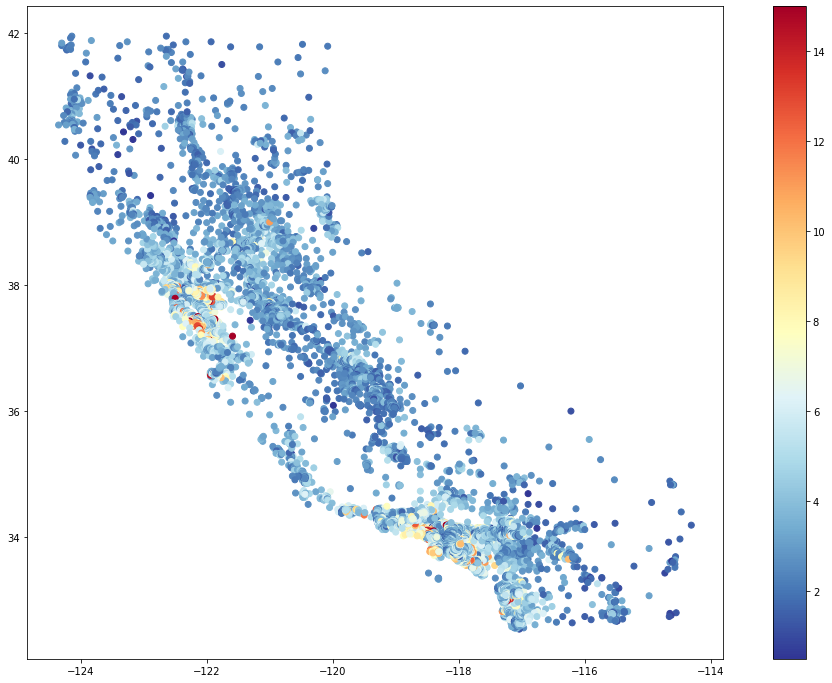

In [10]:
# Средний доход для домохозяйств в пределах квартала домов
geo_df.plot(column='MedInc',legend=True, figsize=(18, 12),cmap='RdYlBu_r')

<AxesSubplot:>

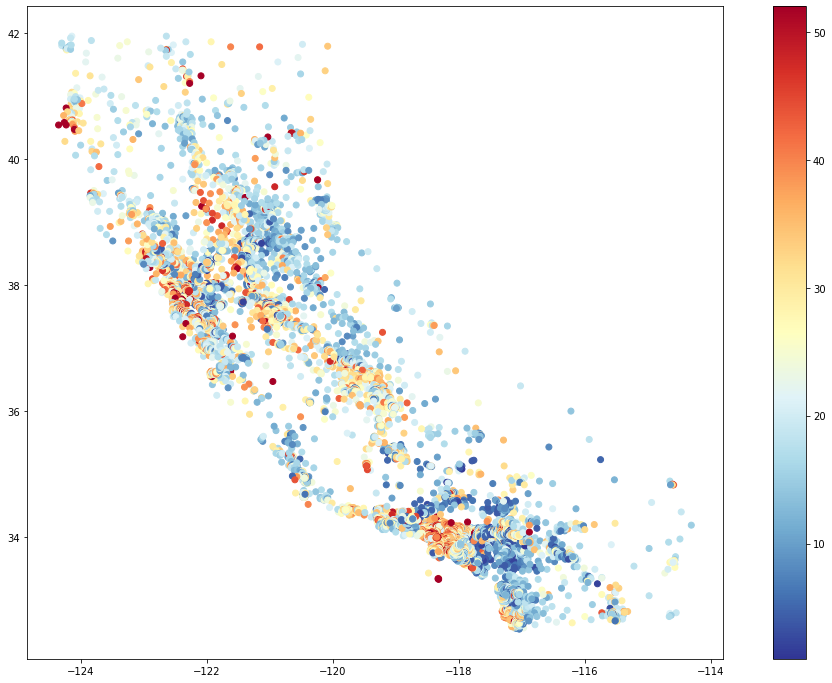

In [11]:
# Возраст домов в пределах квартала (меньшее число означает более новое здание)
geo_df.plot(column='HouseAge',legend=True, figsize=(18, 12),cmap='RdYlBu_r')

<AxesSubplot:>

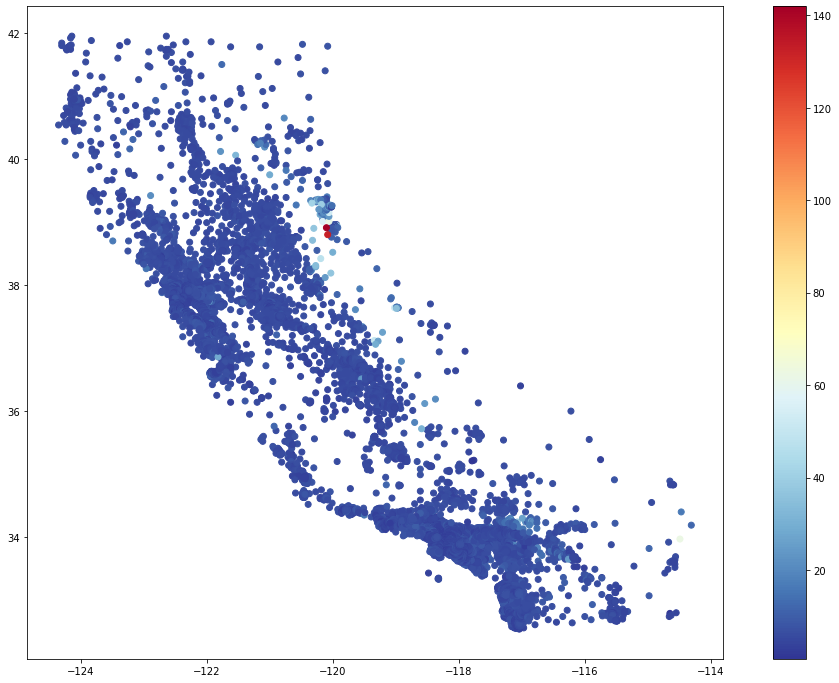

In [12]:
# Среднее количество комнат в пределах квартала.
geo_df.plot(column='AveRooms',legend=True, figsize=(18, 12),cmap='RdYlBu_r')

In [ ]:
# Среднее количество спален в пределах квартала.
geo_df.plot(column='AveBedrms',legend=True, figsize=(18, 12),cmap='RdYlBu_r')

In [ ]:
# Общее количество людей, проживающих в пределах квартала.
geo_df.plot(column='Population',legend=True, figsize=(18, 12),cmap='RdYlBu_r')

In [ ]:
# Среднее количество участников домохозяйства.
geo_df.plot(column='AveOccup',legend=True, figsize=(18, 12),cmap='RdYlBu_r')